<a href="https://colab.research.google.com/github/damayant/Data-Science/blob/master/capstone_project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#read the csv
data = pd.read_csv('data.csv')

In [ ]:
#drop duplicate entries
data = data.drop_duplicates()


In [7]:
#drop rows where postal, phone1 are empty
data = data.dropna(subset=['postal','phone1'])

In [8]:
#save cleaned data in a new csv
cleaned_data = pd.DataFrame(data)
cleaned_data.to_csv('cleaned_data.csv',index=False)

In [1]:
pip install pgeocode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pgeocode

def get_province(postal_code):
    nomi = pgeocode.Nominatim('ca')
    location_info = nomi.query_postal_code(postal_code)
    province = location_info.state_name
    return province

# Example usage
postal_code = 'V7P 3A2'  # Replace with the postal code you want to lookup
province = get_province(postal_code)
print(f"The province for postal code {postal_code} is {province}.")


The province for postal code V7P 3A2 is British Columbia.


In [10]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('cleaned_data.csv')

# Apply the get_province function to the 'postal_code' column
data['province'] = data['postal'].apply(get_province)

# Save the updated DataFrame to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

In [12]:
from sklearn.cluster import KMeans
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('cleaned_data.csv')
# Group customers by province and count the number of customers in each province
province_counts = data.groupby('province')['email'].count().reset_index()

# Prepare the data for clustering
X = province_counts[['email']]

# Perform K-means clustering to create clusters
kmeans = KMeans(n_clusters=3)  # Change the number of clusters as per your requirement
kmeans.fit(X)

# Add the cluster labels to the DataFrame
province_counts['Cluster'] = kmeans.labels_

# Print the clusters
print(province_counts)




           province  email  Cluster
0           Alberta      7        0
1  British Columbia      5        0
2          Manitoba      1        2
3     New Brunswick      3        2
4       Nova Scotia      1        2
5           Ontario     15        1
6            Quebec      6        0
7      Saskatchewan      1        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


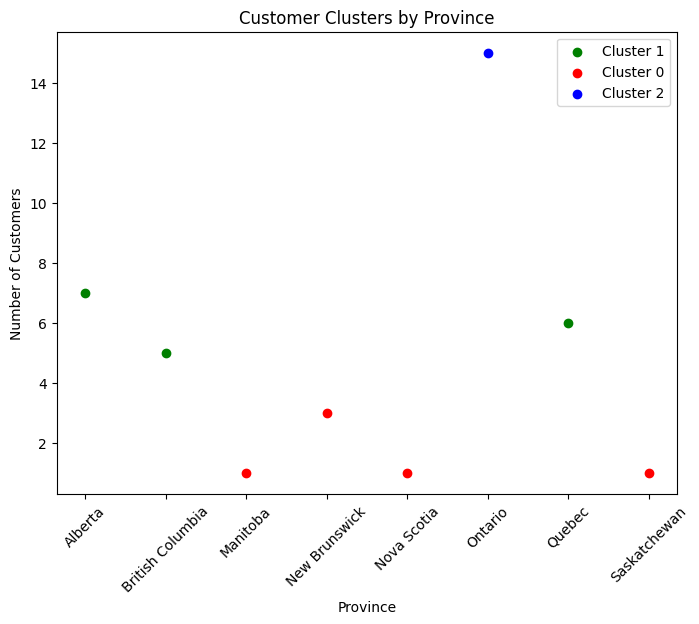

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('cleaned_data.csv')

# Group customers by province and count the number of customers in each province
province_counts = data.groupby('province')['email'].count().reset_index()

# Prepare the data for clustering
X = province_counts[['email']]

# Perform K-means clustering to create clusters
kmeans = KMeans(n_clusters=3)  # Change the number of clusters as per your requirement
kmeans.fit(X)

# Add the cluster labels to the DataFrame
province_counts['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Assigning different colors to each cluster
colors = ['red', 'green', 'blue']

# Plotting data points with cluster colors
for cluster in province_counts['Cluster'].unique():
    cluster_data = province_counts[province_counts['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['email'], color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('Province')
plt.ylabel('Number of Customers')
plt.title('Customer Clusters by Province')
plt.legend()
plt.xticks(province_counts.index, province_counts['province'], rotation=45)

# Display the plot
plt.show()